# COMPSS 212: Final Group Project
## Why do you waste so much time on social media?

#### by Alex Liu, Shaily Bajracharya, and Srishti Gojamgunde

### Background (I'm writing this at 3 am so it doesn't sound very smart, we can fix it later...)

In recent years, social media usage has been found to predict individual and societal outcomes such as social anxiety, depressive symptoms, dissociative symptoms, low self-esteem, health risk behaviors, addictive behavior, insomnia, political polarization, misinformation, cultural homogenization, environmental impacts, etc.(Arguedas et al., 2022, Baughan et al., 2022; Cunningham et al., 2021; González-Bueso et al., 2018; McCabe et al., 2024; Moon and Lewis., 2024, Purba et al., 2023; Valkenburg et al., 2021; Walkley, 2023). 

The list of negative consequences of social media seems to be endless, but there is a surprising dearth of research on the factors that actually predict social media usage. 

### Potential factors predicting social media usage:

Through our research we have identified the following relationships as having some support from academic literature:
* Age and gender affect the social media platform of choice: younger adults are more active on platforms like Instagram, Snapchat, and TikTok, and women tend to use platforms such as Instagram, Facebook, and TikTok more than men who are more active on platforms like Reddit and X (formerly Twitter) (Pew Research Center, 2024; Vaid and Harari, 2020).
*  Age also impacts a person's financial stability, and financial stability (specifically, high household income) has been associated with increased social media usage (Hruska and Maresova, 2020).
*  Gender impacts profession (MacDonald et al., 2023) and profession at least partly determines financial situation which, in turn, is associated with increased social media usage.
*  Rural populations use social media, and the internet in general, less than urban populations (Hale et al., 2010). People living in rural areas are also more likely to own property, but the median income levels are lower than in comparable urban locations (Copeland, 2022).
*  Self-reported levels of productivity, lower measures of restraint and self-control, and greater addiction level all predict significant increases in social media usage and there is also evidence for social media to exacerbate all of them(Li et al., 2021; Peng and Liao, 2023).
*  One might expect to see some differences in social media usage based on device type (phones provide ease of accessibility while travelling or lying in bed whereas computers do not), OS, and connection type (we can intuit reduced usage when users are using their personal mobile network vs public WiFi). 


# !!!!(IS THIS TOO MANY CITATIONS?)
# Drinking game: Take a shot everytime Srishti types 'social media usage'.

### Visualizing relationships between variables using Directed Acyclic Graphs (DAGs)

In [31]:
# USE THIS CODE BLOCK TO INSTALL NECESSARY PACKAGES
install.packages("ggdag", lib = "/srv/r")
install.packages("GGally", lib = "/srv/r")

In [49]:
# Loading ALL libraries and packages in this one code cell pleaseeeeeeeeeeee
library(tidyverse)
library(dplyr)
library(ggplot2)
library(ggdag)
library(gridExtra)
library(GGally)

In [63]:
tidy_ggdag <- dagify(
  SM ~ R_U + Fin + X + D +Age,
  SM ~ ~A, 
  SM ~ ~C,
  SM ~ ~P,
  Fin ~ Age + Job + R_U,
  X ~ Age + M_F,
  Job ~ M_F,
  P ~Job,
  exposure = "X",
  outcome = "SM"
) %>%
  tidy_dagitty()

tidy_ggdag

# A DAG with 11 nodes and 15 edges
#
# Exposure: X
# Outcome: SM
#
# A tibble: 16 × 8
   name        x      y direction to       xend   yend circular
   <chr>   <dbl>  <dbl> <fct>     <chr>   <dbl>  <dbl> <lgl>   
 1 A     -1.11   -2.56  <->       SM     0.180  -1.34  FALSE   
 2 Age    1.19   -0.712 ->        Fin    0.0487 -0.146 FALSE   
 3 Age    1.19   -0.712 ->        SM     0.180  -1.34  FALSE   
 4 Age    1.19   -0.712 ->        X      1.46    0.178 FALSE   
 5 C      1.43   -2.58  <->       SM     0.180  -1.34  FALSE   
 6 D      0.155  -3.12  ->        SM     0.180  -1.34  FALSE   
 7 Fin    0.0487 -0.146 ->        SM     0.180  -1.34  FALSE   
 8 Job    0.121   1.39  ->        Fin    0.0487 -0.146 FALSE   
 9 Job    0.121   1.39  ->        P     -0.703   0.393 FALSE   
10 M_F    1.45    1.73  ->        Job    0.121   1.39  FALSE   
11 M_F    1.45    1.73  ->        X      1.46    0.178 FALSE   
12 P     -0.703   0.393 <->       SM     0.180  -1.34  FALSE   
13 R_U   -1.05   -

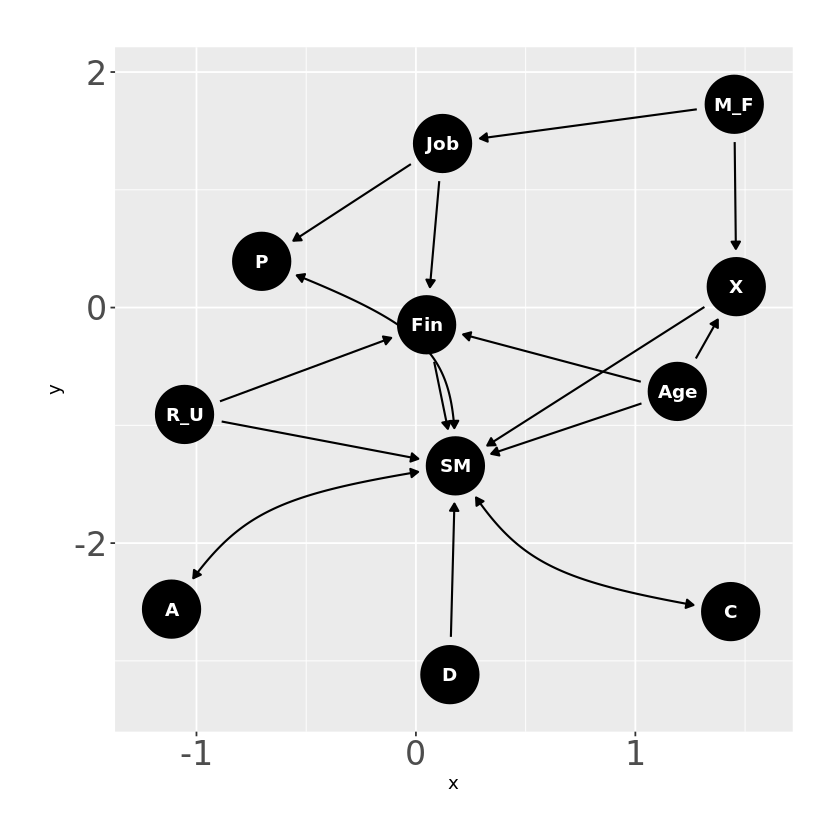

In [64]:
tidy_ggdag %>%
  ggdag() +
  theme(
    plot.margin = unit(c(1, 1, 1, 1), "cm"),
    axis.text = element_text(size = 20)      # Adjust text size
  )


#### Insights from the DAG:
* Demographics i.e. rural vs urban may affect both Social Media Usage as well as overall Financial Status (which is causally linked to Social Media Usage). Thus, there is a backdoor path created. We can block this backdoor path by controlling for Demographics since the backdoor criterion is met: All backdoor paths are blocked and no element of Demographics is a collider.
* Age is also a confounder as it affects Financial Status, Platform, and Social Media Usage (Younger people are more likely to be active on social media).
* Financial Status arises a collider as it descends from Job, Age, and Demographics. We will explicitly avoid controlling for Financial Status to prevent collider bias. 

### Data Exploration

In [52]:
#Loading the dataset
url <- "https://raw.githubusercontent.com/srishtigoj/Stats-Project/refs/heads/main/Time-Wasters%20on%20Social%20Media%202.csv"
data <- read.csv(url)
head(data)

,UserID,Age,Gender,Location,Income,Debt,Owns.Property,Profession,Demographics,Platform,⋯,ProductivityLoss,Satisfaction,Watch.Reason,DeviceType,OS,Watch.Time,Self.Control,Addiction.Level,CurrentActivity,ConnectionType
,<int>,<int>,<chr>,<chr>,<int>,<lgl>,<lgl>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
1,1,56,Male,Pakistan,82812,TRUE,TRUE,Engineer,Rural,Instagram,⋯,3,7,Procrastination,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
2,2,46,Female,Mexico,27999,FALSE,TRUE,Artist,Urban,Instagram,⋯,5,5,Habit,Computer,Android,5:00 PM,7,3,At school,Wi-Fi
3,3,32,Female,United States,42436,FALSE,TRUE,Engineer,Rural,Facebook,⋯,6,4,Entertainment,Tablet,Android,2:00 PM,8,2,At home,Mobile Data
4,4,60,Male,Barzil,62963,TRUE,FALSE,Waiting staff,Rural,YouTube,⋯,3,7,Habit,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
5,5,25,Male,Pakistan,22096,FALSE,TRUE,Manager,Urban,TikTok,⋯,8,2,Boredom,Smartphone,iOS,8:00 AM,10,0,At home,Mobile Data
6,6,38,Male,Vietnam,45279,FALSE,FALSE,driver,Urban,Instagram,⋯,3,7,Entertainment,Computer,Android,9:00 PM,5,5,At home,Wi-Fi


This dataset is acquired from Kaggle, posted by user 'Shahzad Aslam' and is:
"Generated through advanced synthetic data techniques using tools like NumPy and pandas, this dataset mimics real-world social media usage scenarios. Despite being artificially created, it accurately reflects genuine usage trends..."
There is no more information about how the data is simulated, and how it reflects real user trends, and so, we will be careful in our interpretation of any findings.

In [53]:
categorical <- names(data)[sapply(data, function(x) is.character(x) | is.factor(x))]
print("Categorical columns:")
print(categorical)

[1] "Categorical columns:"
 [1] "Gender"          "Location"        "Profession"      "Demographics"   
 [5] "Platform"        "Video.Category"  "Frequency"       "Watch.Reason"   
 [9] "DeviceType"      "OS"              "Watch.Time"      "CurrentActivity"
[13] "ConnectionType" 


In [54]:
for(col in categorical) {
    cat("\nUnique values in", col, ":", length(unique(data[[col]])), "values\n")
    print(unique(data[[col]]))
}


Unique values in Gender : 3 values
[1] "Male"   "Female" "Other" 

Unique values in Location : 10 values
 [1] "Pakistan"      "Mexico"        "United States" "Barzil"       
 [5] "Vietnam"       "India"         "Indonesia"     "Philippines"  
 [9] "Japan"         "Germany"      

Unique values in Profession : 9 values
[1] "Engineer"      "Artist"        "Waiting staff" "Manager"      
[5] "driver"        "Students"      "Labor/Worker"  "Cashier"      
[9] "Teacher"      

Unique values in Demographics : 2 values
[1] "Rural" "Urban"

Unique values in Platform : 4 values
[1] "Instagram" "Facebook"  "YouTube"   "TikTok"   

Unique values in Video.Category : 9 values
[1] "Pranks"        "Vlogs"         "Gaming"        "Jokes/Memes"  
[5] "Entertainment" "ASMR"          "Life Hacks"    "Trends"       
[9] "Comedy"       

Unique values in Frequency : 4 values
[1] "Night"     "Afternoon" "Evening"   "Morning"  

Unique values in Watch.Reason : 4 values
[1] "Procrastination" "Habit"         

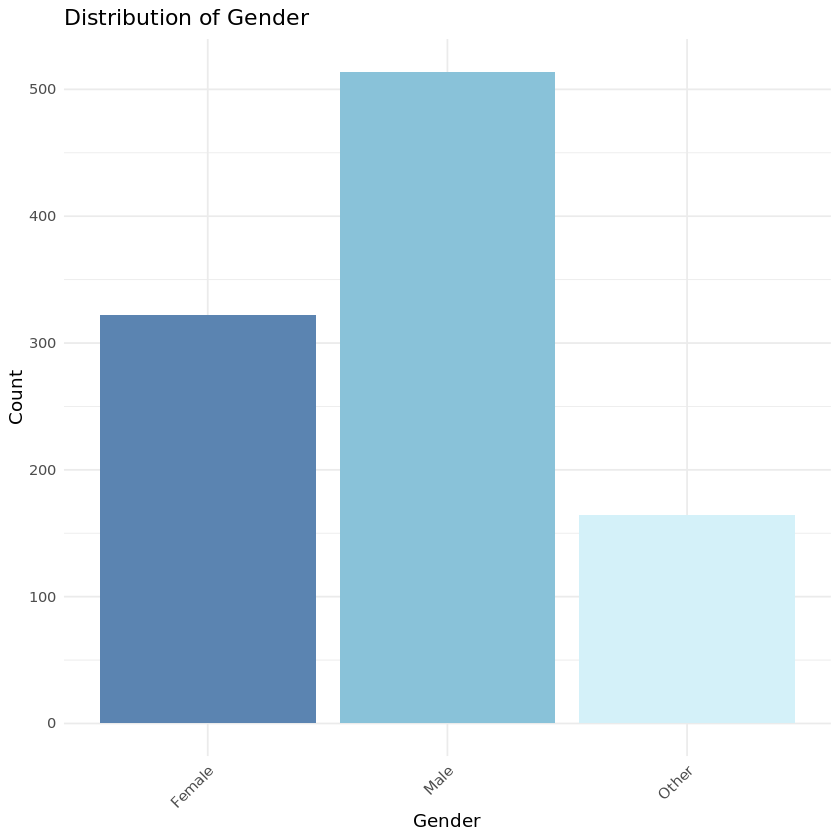

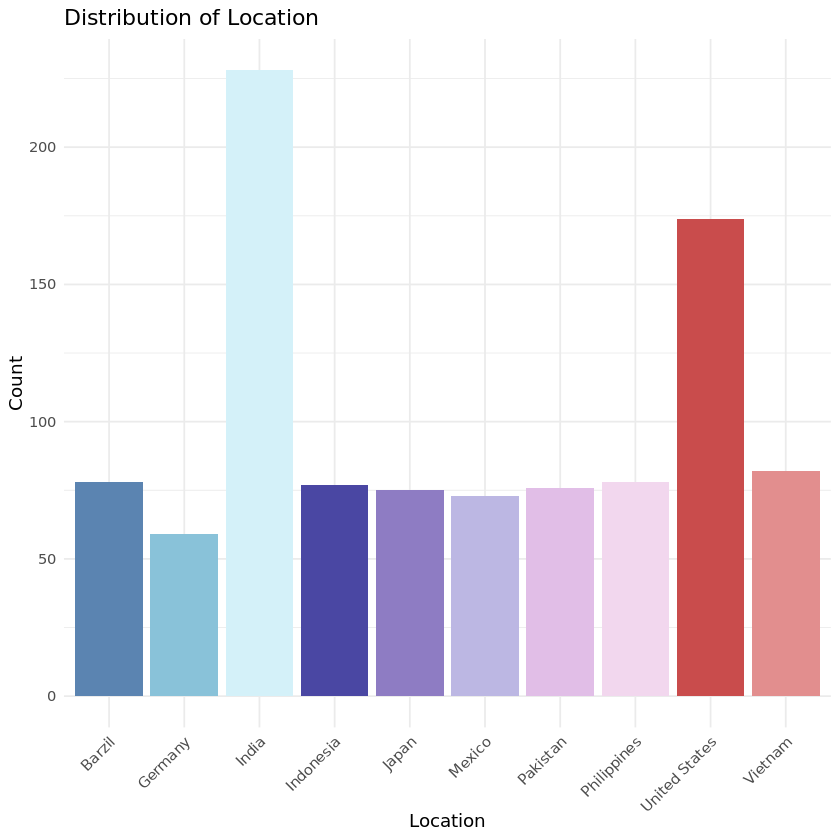

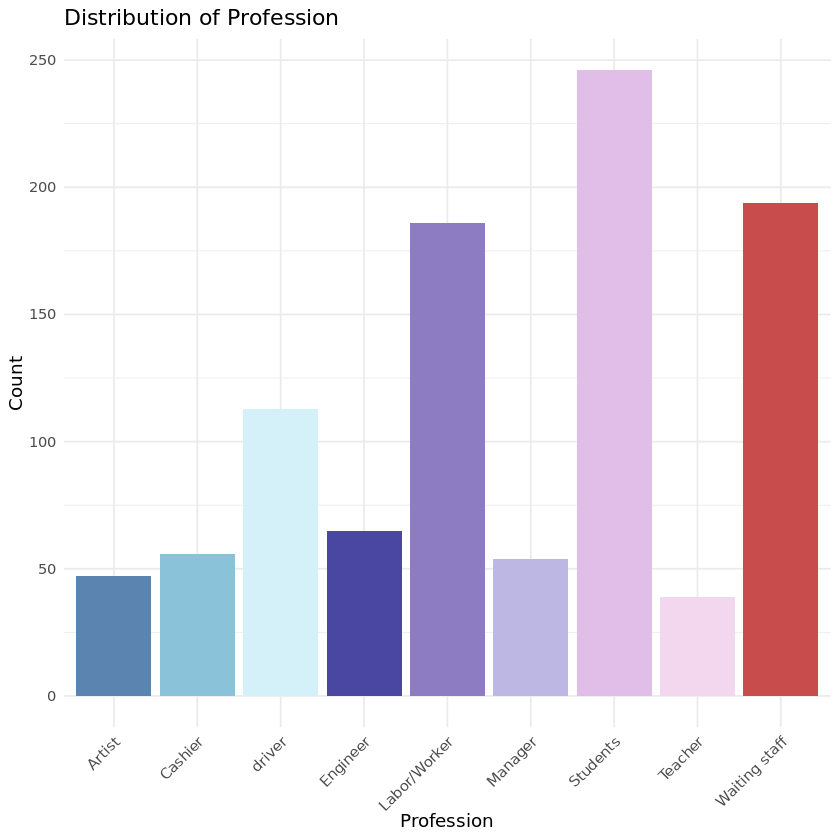

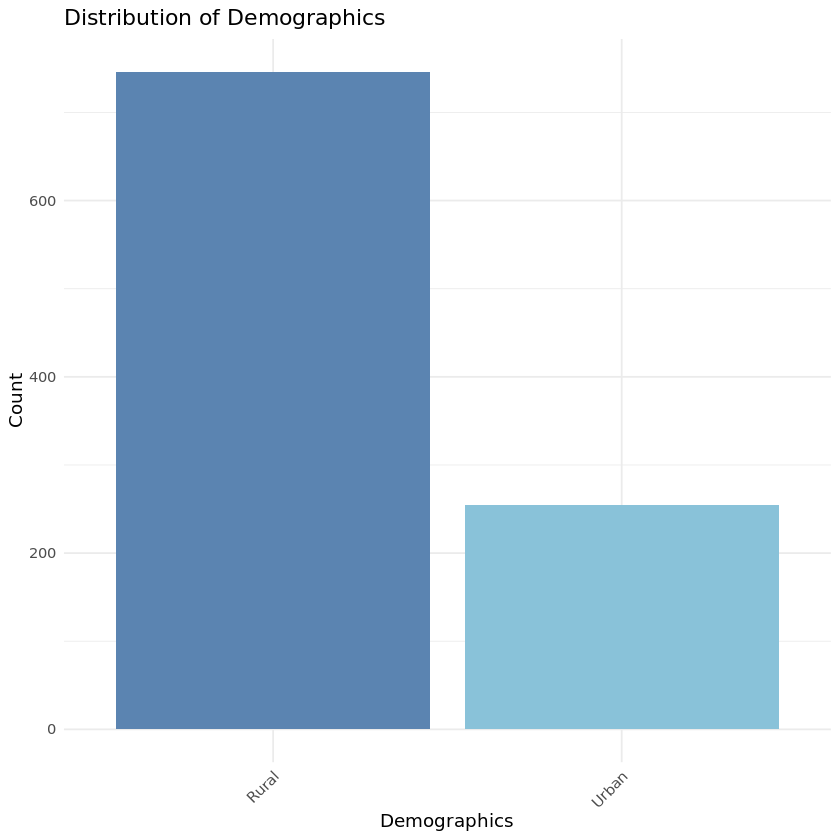

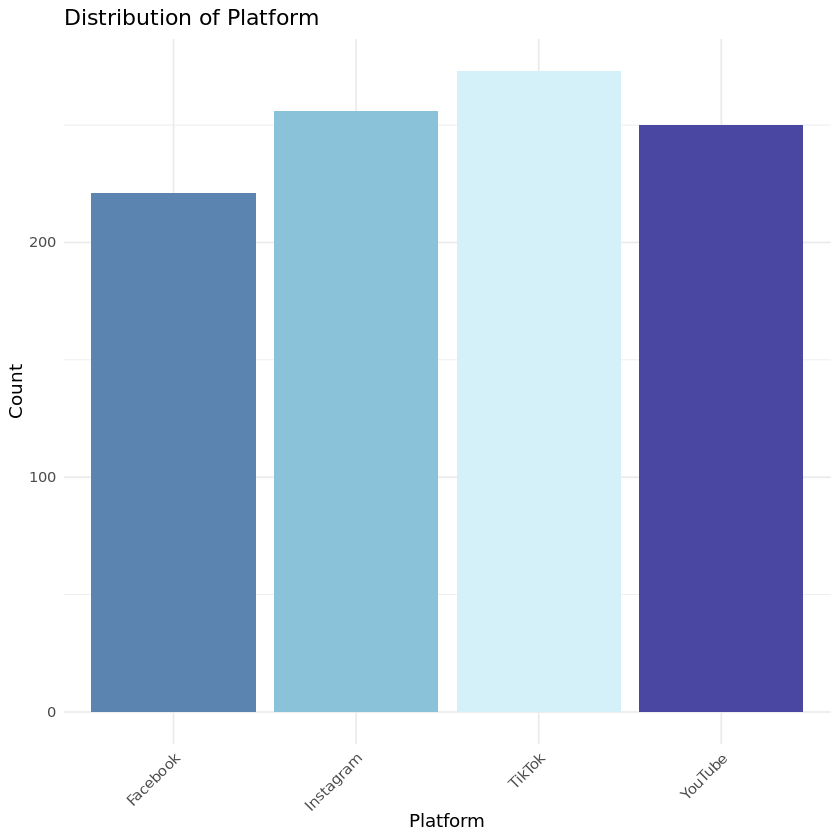

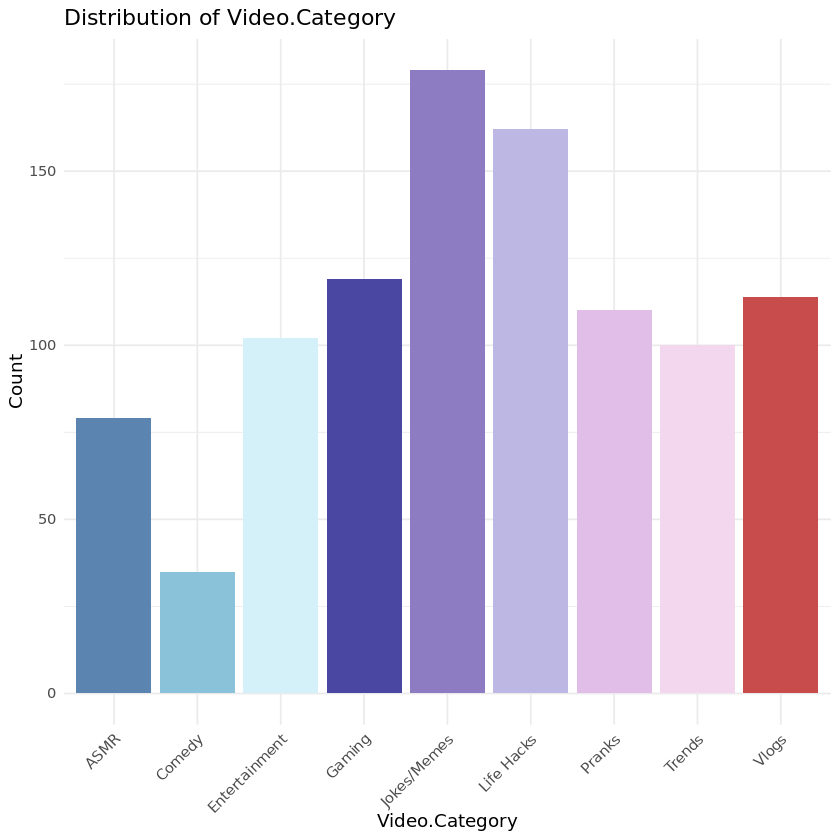

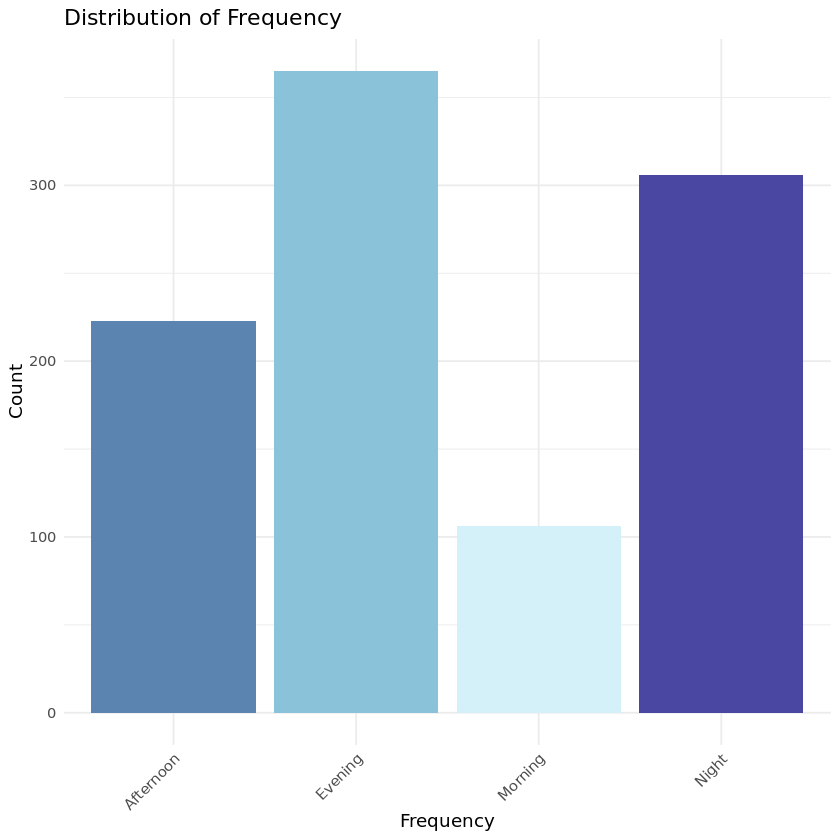

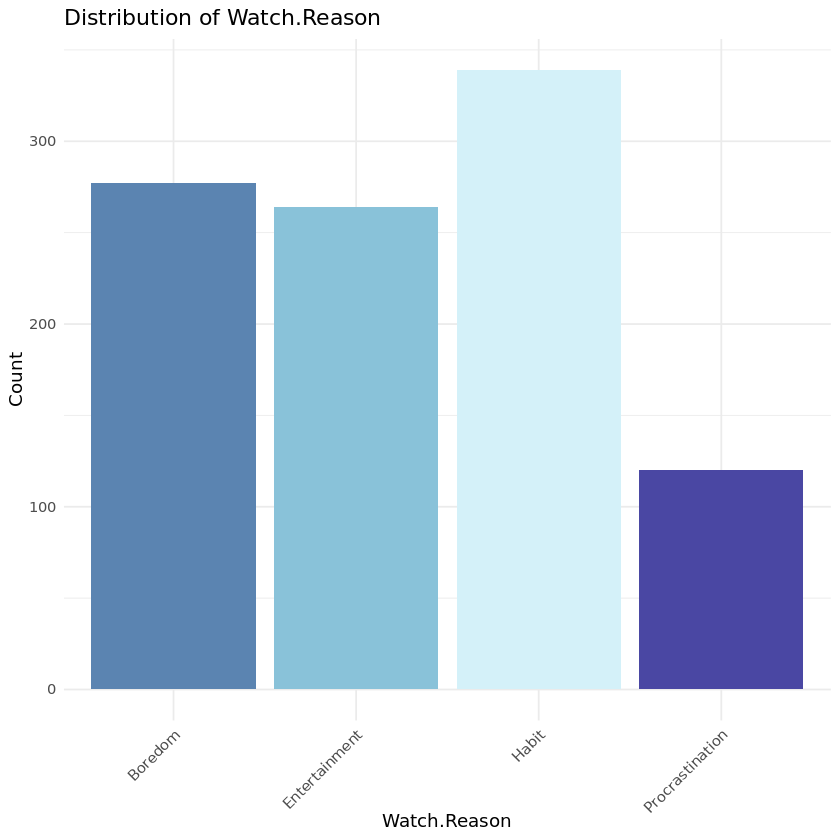

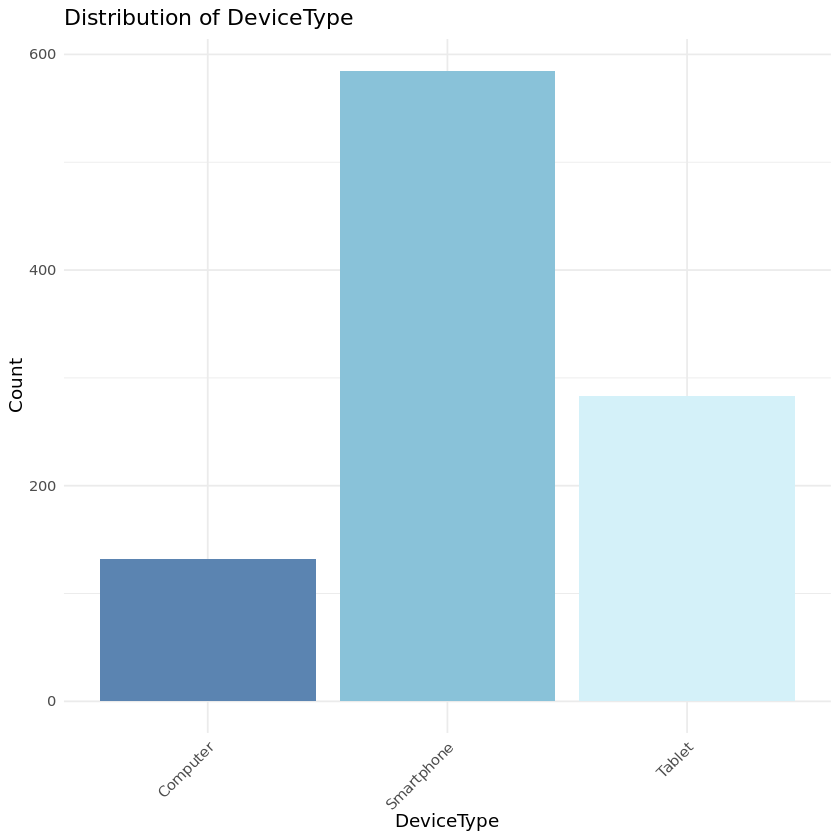

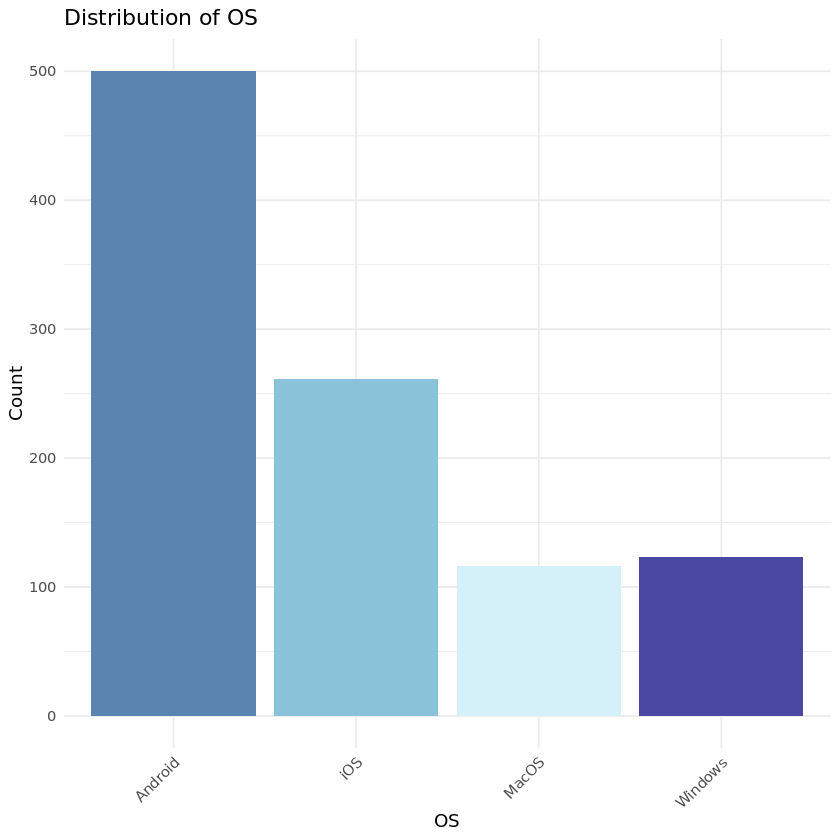

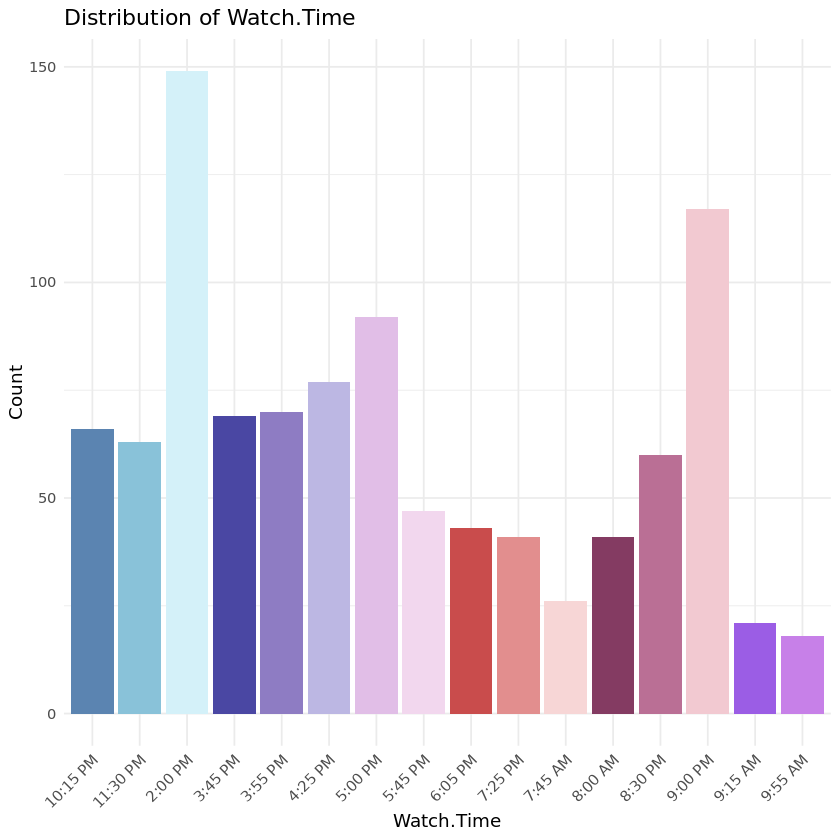

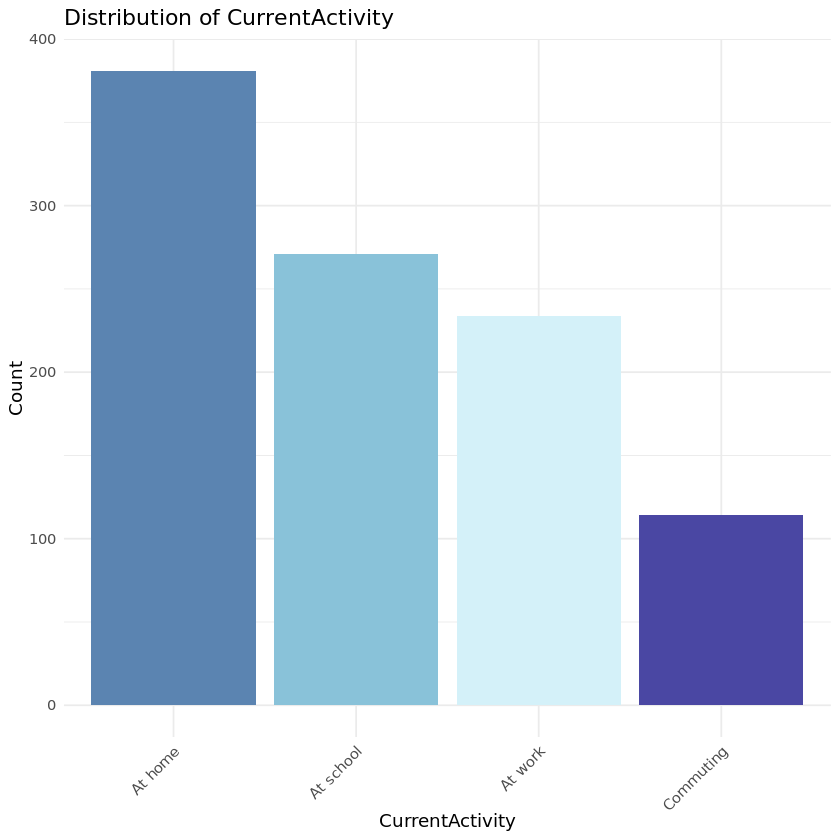

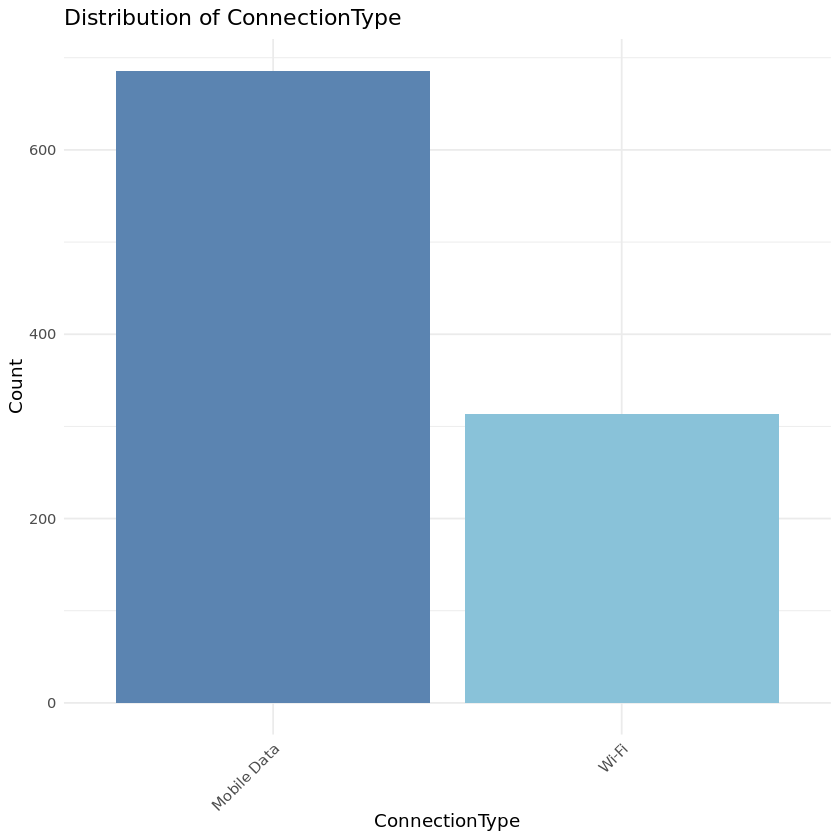

In [55]:
#Counting occurences of categorical variables and visualizing the distributions
blue_palette <- c("#5b84b1","#89c2d9","#d4f1f9","#4a47a3","#8e7cc3","#bcb7e3","#e1bee7","#f2d7ee","#c94c4c","#e28e8e", "#f7d6d6","#843b62", "#ba6f95", "#f2c9d1", "#9b5de5", "#c780e8")

for (column in categorical) {
  counts <- as.data.frame(table(data[[column]]))
  colnames(counts) <- c("Category", "Count")
  
  plot <- ggplot(counts, aes(x = Category, y = Count, fill = Category)) +
    geom_bar(stat = "identity") +
    labs(title = paste("Distribution of", column),
         x = column,
         y = "Count") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    guides(fill = FALSE) +
    scale_fill_manual(values = blue_palette) 
  
  print(plot)  # Display the plot
}

Here, we can see that certain categories have overrepresented groups, however, if the overrepresentation reflects the actual population distribution, it may not need correction. For instance, India and United States are two overrepresented locations but these two countries have the largest number of social media users in real life (excluding China) and thus, we can allow the skewed distribution in our data. 

The only category we might want to correct is 'Demographics' are Rural demographics are more frequently appreading in the data. Both upsampling and downsampling overrepresented groups has its limitations (discarding data and overfitting respectively). Thus, we will be using **bootstrapping** to repeatedly sample from the data, ensuring that the results are robust despite overrepresentation.

### Choice of Variables

In [56]:
#Creating variable to capture financial status

data$Income_std <- scale(data$Income)[, 1]

data$Debt <- as.numeric(data$Debt)
data$Owns.Property <- as.numeric(data$Owns.Property)

data$Debt_std <- scale(data$Debt)[, 1]                  
data$Owns.Property_std <- scale(data$Owns.Property)[, 1]

data$Financial_Status <- data$Income_std - data$Debt_std + data$Owns.Property_std

In [61]:
#Creating a variable to capture Social Media usage

data$Total.Time.Spent_std <- scale(data$Total.Time.Spent)[, 1]
data$Num.Sessions_std <- scale(data$Number.of.Sessions)[, 1]
data$Scroll.Rate_std <- scale(data$Scroll.Rate)[, 1]
data$Num.Videos_std <- scale(data$Number.of.Videos.Watched)[, 1]

data$SM_Usage <- data$Total.Time.Spent_std + data$Num.Sessions_std + data$Scroll.Rate_std + data$Num.Videos_std

Based on background research as well as initial data exploration we choose the following predictors to model Social Media Usage:
* 
* 

#### Checking for Linearity Between Variables

In [ ]:
subset_data <- data[, c("dependent_var", "predictor1", "predictor2", "predictor3")]

# Create a pairplot
ggpairs(subset_data)

### Limitations/ Directions for Follow-Up Research:
* Missing variables/ Potential Omitted variable Bias(OVB): Depression, Anxiety, Stress, Education, Self-Esteem, Personality Traits, etc. which have also been found to correlate with social media usage.
* This analysis does not take into consideration complex psychological factors that may lead to social media addiction such as salience, mood modification, relapse, withdrawal, and conflict, etc. Similarly, we have not taken into consideration the specific mechanism behind the relationships between other predictors and social media usage. For example, sociocultural factors and how they may predict rural vs urban attitudes towards social media.     

### References:

Amanda Baughan, Mingrui Ray Zhang, Raveena Rao, Kai Lukoff, Anastasia Schaadhardt, Lisa D. Butler, and Alexis Hiniker. 2022. “I Don’t Even Remember What I Read”: How Design Influences Dissociation on Social Media. In Proceedings of the 2022 CHI Conference on Human Factors in Computing Systems (CHI '22). Association for Computing Machinery, New York, NY, USA, Article 18, 1–13. https://doi.org/10.1145/3491102.3501899

Arguedas, A., Robertson, C. T., Fletcher, R., & Nielsen, R. K. (2022, January 19). Echo chambers, filter bubbles, and polarisation: a literature review. Reuters Institute for the Study of Journalism. https://reutersinstitute.politics.ox.ac.uk/echo-chambers-filter-bubbles-and-polarisation-literature-review#header--8

Baerg MacDonald, K., Benson, A., Sakaluk, J. K., & Schermer, J. A. (2023). Pre-Occupation: A Meta-Analysis and Meta-Regression of Gender Differences in Adolescent Vocational Interests. Journal of Career Assessment, 31(4), 715-738. https://doi.org/10.1177/10690727221148717

Copeland, C. (2022, March 3). Understanding the Finances of Rural vs. Urban Americans. Employee Benefit Research Institute. https://www.ebri.org/content/understanding-the-finances-of-rural-vs.-urban-americans

Cunningham, S., Hudson, C.C. & Harkness, K. Social Media and Depression Symptoms: a Meta-Analysis. Res Child Adolesc Psychopathol 49, 241–253 (2021). https://doi-org.libproxy.berkeley.edu/10.1007/s10802-020-00715-7

González-Bueso V, Santamaría JJ, Fernández D, Merino L, Montero E, Ribas J. Association between Internet Gaming Disorder or Pathological Video-Game Use and Comorbid Psychopathology: A Comprehensive Review. Int J Environ Res Public Health. 2018 Apr 3;15(4):668. doi: 10.3390/ijerph15040668. PMID: 29614059; PMCID: PMC5923710.

Hale, T. M., Cotten, S. R., Drentea, P., & Goldner, M. (2010). Rural-Urban Differences in General and Health-Related Internet Use. American Behavioral Scientist, 53(9), 1304-1325. https://doi.org/10.1177/0002764210361685

Hruska, J., & Maresova, P. (2020). Use of Social Media Platforms among Adults in the United States—Behavior on Social Media. Societies, 10(1), 27. https://doi.org/10.3390/soc10010027 

Li, S., Ren, P., Chiu, M. M., Wang, C., & Lei, H. (2021). The Relationship Between Self-Control and Internet Addiction Among Students: A Meta-Analysis. Frontiers in Psychology, 12. https://doi.org/10.3389/fpsyg.2021.735755

McCabe, S.D., Ferrari, D., Green, J. et al. Post-January 6th deplatforming reduced the reach of misinformation on Twitter. Nature 630, 132–140 (2024). https://doi.org/10.1038/s41586-024-07524-8

Moon, Y. E., & Lewis, S. C. (2024). Social Media as Commodifier or Homogenizer? Journalists’ Social Media Use in Individualistic and Collectivist Cultures and Its Implications for Epistemologies of News Production. Digital Journalism, 1–20. https://doi.org/10.1080/21670811.2024.2303988

Patti Valkenburg, Ine Beyens, J Loes Pouwels, Irene I van Driel, Loes Keijsers, Social Media Use and Adolescents’ Self-Esteem: Heading for a Person-Specific Media Effects Paradigm, Journal of Communication, Volume 71, Issue 1, February 2021, Pages 56–78, https://doi.org/10.1093/joc/jqaa039

Peng, P., Liao, Y. Six addiction components of problematic social media use in relation to depression, anxiety, and stress symptoms: a latent profile analysis and network analysis. BMC Psychiatry 23, 321 (2023). https://doi.org/10.1186/s12888-023-04837-2

Purba A K, Thomson R M, Henery P M, Pearce A, Henderson M, Katikireddi S V et al. Social media use and health risk behaviours in young people: systematic review and meta-analysis BMJ 2023; 383 :e073552 doi:10.1136/bmj-2022-073552 

Social Media and News Fact Sheet. (2024, September 17). Pew Research Center. https://www.pewresearch.org/journalism/fact-sheet/social-media-and-news-fact-sheet/

Social Media Users by Country 2024. (n.d.). World Population by Country 2024 (Live). https://worldpopulationreview.com/country-rankings/social-media-users-by-country

Vaid, S. S., & Harari, G. M. (2020). Who Uses What and How Often?: Personality Predictors of Multiplatform Social Media Use Among Young Adults. Journal of Research in Personality, 104005. https://doi.org/10.1016/j.jrp.2020.104005

Walkley, S. (2023, March). The Carbon Cost of Social Media - The Carbon Literacy Project. The Carbon Literacy Project. https://carbonliteracy.com/the-carbon-cost-of-social-media/ 